Importing Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing Dataset

In [89]:
df = pd.read_csv('/content/drive/MyDrive/Fenny Labs Intern/2 Main/Car Data.csv')
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


EDA --> Exploratory Data Analysis

In [90]:
print(df.shape)

(8128, 13)


In [91]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


In [92]:
df.isnull().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

As we can see above, there are some null values in the dataset. So we have to remove the entries which have some null column.

In [93]:
df = df.dropna()

In [94]:
print(df.shape)

(7906, 13)


In [95]:
df.isnull().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage          False
engine           False
max_power        False
torque           False
seats            False
dtype: bool

All the missing entries have been removed.

In [96]:
x = df.iloc[:, [0,2,6,7,8,9,10,12]]
x.head()

,name,selling_price,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,450000,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,370000,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,158000,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,225000,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,130000,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


These are some variables on which we are going to use segmentation separately and in the last we will be able to get a optimized car profile .

Columns mileage, engine, max_power and seat are float types, so we have to convert them to integer to do further steps.

In [97]:
x = x.astype({'seats':str})
x['seats'] = x['seats'].str.replace('.0','', regex=False).replace({'nan':np.nan})
x.dtypes['seats']

dtype('O')

In [98]:
columns_to_clean = ['mileage', 'engine', 'max_power', 'seats']
x[columns_to_clean] = x[columns_to_clean].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)

In [99]:
x.head()

,name,selling_price,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,450000,Manual,First Owner,23.4,1248,74,5
1,Skoda Rapid 1.5 TDI Ambition,370000,Manual,Second Owner,21.14,1498,103.52,5
2,Honda City 2017-2020 EXi,158000,Manual,Third Owner,17.7,1497,78,5
3,Hyundai i20 Sportz Diesel,225000,Manual,First Owner,23.0,1396,90,5
4,Maruti Swift VXI BSIII,130000,Manual,First Owner,16.1,1298,88.2,5


In [100]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           7906 non-null   object
 1   selling_price  7906 non-null   int64 
 2   transmission   7906 non-null   object
 3   owner          7906 non-null   object
 4   mileage        7906 non-null   object
 5   engine         7906 non-null   object
 6   max_power      7906 non-null   object
 7   seats          7906 non-null   object
dtypes: int64(1), object(7)
memory usage: 555.9+ KB


In [101]:
x['mileage'] = x['mileage'].astype(str).astype(float)
x['engine'] = x['engine'].astype(str).astype(int)
x['max_power'] = x['max_power'].astype(str).astype(float)
x['seats'] = x['seats'].astype(str).astype(int)

In [102]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   selling_price  7906 non-null   int64  
 2   transmission   7906 non-null   object 
 3   owner          7906 non-null   object 
 4   mileage        7906 non-null   float64
 5   engine         7906 non-null   int64  
 6   max_power      7906 non-null   float64
 7   seats          7906 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 555.9+ KB


Plotting the correlation matrix from the dataset

In [103]:
import seaborn as sns

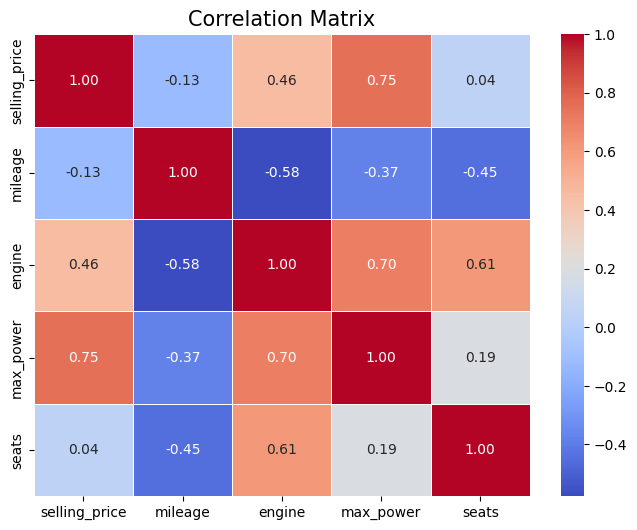

In [104]:
numeric_columns = ['selling_price', 'mileage', 'engine', 'max_power', 'seats']
correlation_matrix = x[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', size=15)
plt.show()

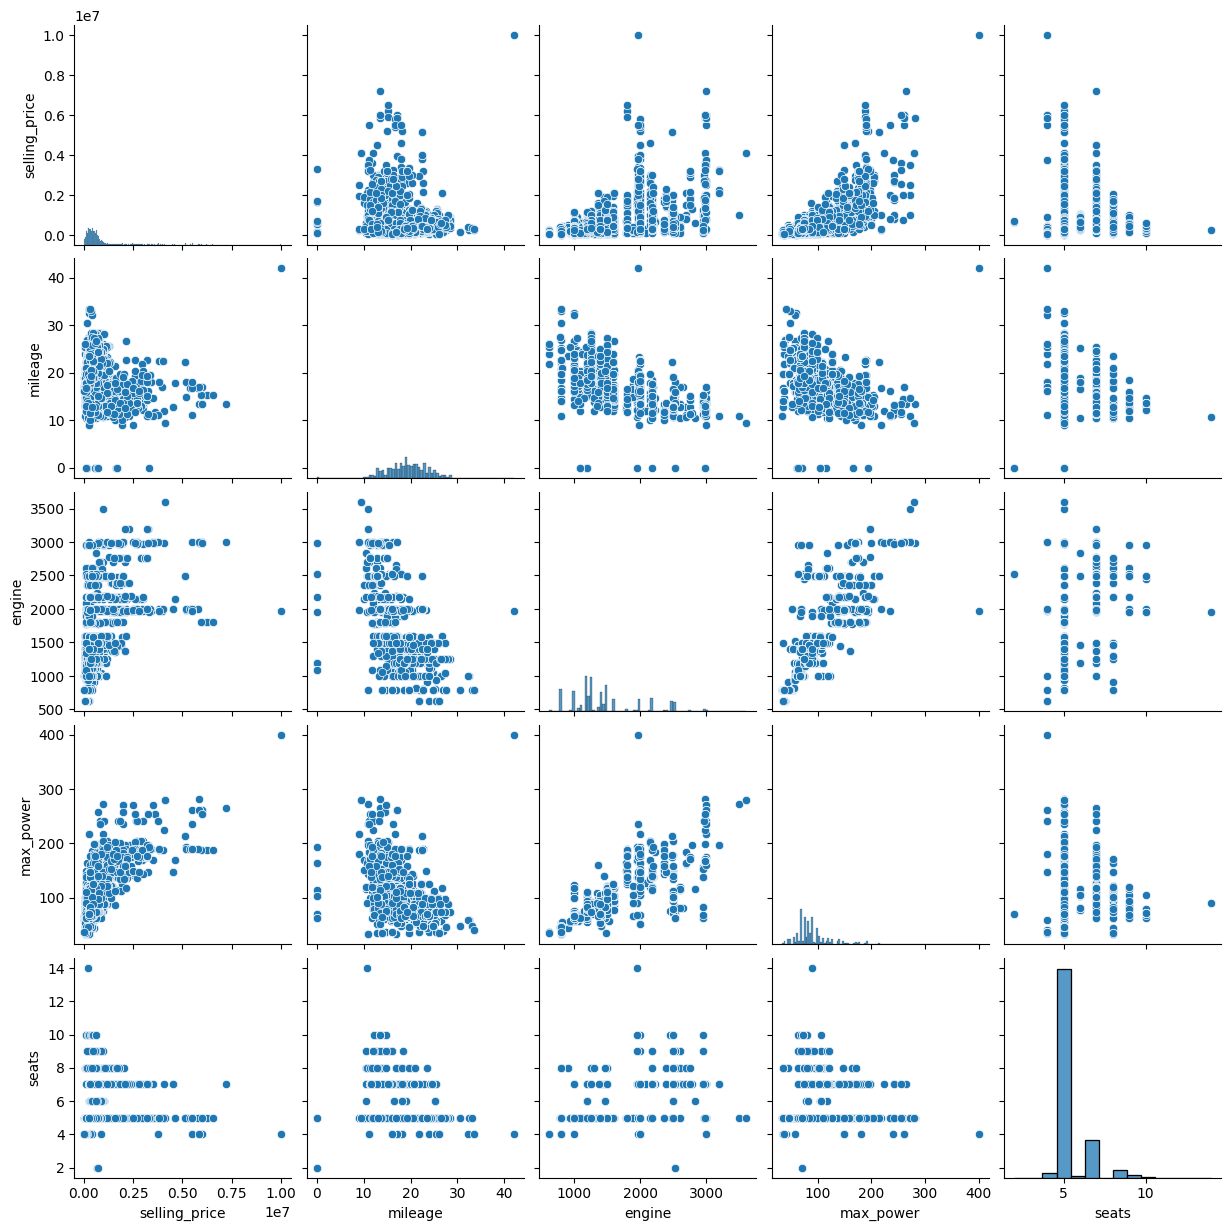

In [105]:
sns.pairplot(x)
plt.show()

Encoding the Categorical Data

In [106]:
x['transmission'].replace(to_replace=['Manual', 'Automatic'],value=[0, 1],inplace=True)
x['owner'].replace(to_replace=['First Owner', 'Second Owner', 'Third Owner','Fourth & Above Owner', 'Test Drive Car'],value=[0, 1, 2, 3, 4],inplace=True)

In [107]:
x.head()

,name,selling_price,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,450000,0,0,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,370000,0,1,21.14,1498,103.52,5
2,Honda City 2017-2020 EXi,158000,0,2,17.70,1497,78.00,5
3,Hyundai i20 Sportz Diesel,225000,0,0,23.00,1396,90.00,5
4,Maruti Swift VXI BSIII,130000,0,0,16.10,1298,88.20,5


Scaling the values

In [108]:
x_to_be_scaled = x[['selling_price', 'mileage','engine','max_power','seats','owner','transmission']]

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_to_be_scaled)

K-Means Using PCA (Principal Componenet Analysis)

In [110]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca = pca.fit_transform(x_scaled)
x_pca = pd.DataFrame(pca, columns=['selling_price', 'mileage', 'engine', 'max_power', 'seats', 'owner', 'transmission'])

x_pca.head()

,selling_price,mileage,engine,max_power,seats,owner,transmission
0,-1.112218,0.662679,-0.616156,0.279865,0.005520,-0.176331,0.143371
1,-0.383928,-0.142460,0.675109,0.616292,0.288460,-0.504449,-0.146001
2,-0.654663,-1.254042,1.909962,0.242916,0.142731,-0.138902,0.248040
3,-0.824419,0.511707,-0.606223,0.284356,0.188137,-0.620927,-0.046888
4,-0.411981,-0.211975,-0.352226,-0.950684,0.807077,-0.079579,-0.177143


from matplotlib import pyplot as plt
_df_0['selling_price'].plot(kind='hist', bins=20, title='selling_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mileage'].plot(kind='hist', bins=20, title='mileage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['engine'].plot(kind='hist', bins=20, title='engine')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['max_power'].plot(kind='hist', bins=20, title='max_power')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='selling_price', y='mileage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mileage', y='engine', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='engine', y='max_power', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='max_power', y='seats', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['selling_price'].plot(kind='line', figsize=(8, 4), title='selling_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['mileage'].plot(kind='line', figsize=(8, 4), title='mileage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['engine'].plot(kind='line', figsize=(8, 4), title='engine')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['max_power'].plot(kind='line', figsize=(8, 4), title='max_power')
plt.gca().spines[['top', 'right']].set_visible(False)

Using the elbow method to find the optimal number of clusters -- USING WCSS


In [111]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x_pca)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

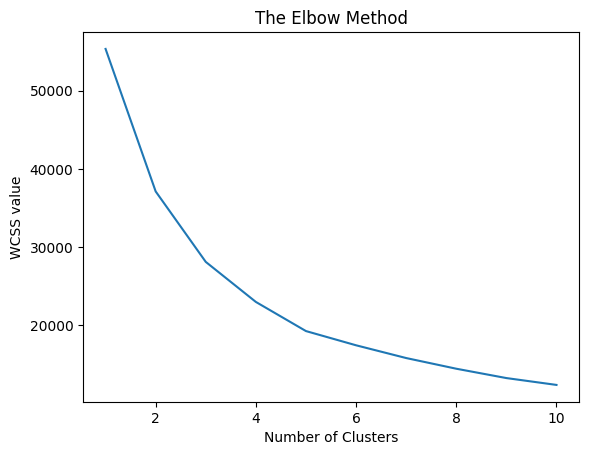

In [112]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS value")
plt.show()

As we can observe a steep decrease after n_cluster = 4, therefore 4 is the optimized number of clusters.

In [113]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmean.fit_predict(x_pca)
cluster_labels = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [114]:
pd.Series(kmean.labels_).value_counts()

3    3966
2    2122
0    1208
1     610
Name: count, dtype: int64

Creating the new feature to store our resulting cluster

In [115]:
df['Customer_ID'] = range(1, 7907)

In [116]:
cluster_df = pd.DataFrame({'Customer_ID': df['Customer_ID'], 'Customer_Labels': kmean.labels_})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(cluster_df)

      Customer_ID  Customer_Labels
0               1                3
1               2                2
2               3                2
3               4                3
4               5                3
5               6                3
6               7                3
7               8                2
8               9                3
9              10                3
10             11                2
11             12                2
12             13                2
14             14                2
15             15                3
16             16                2
17             17                2
18             18                2
19             19                3
20             20                2
21             21                3
22             22                3
23             23                3
24             24                3
25             25                3
26             26                3
27             27                3
28             28   

Saved To Google Drive

In [117]:
cluster_df.to_excel("/content/drive/MyDrive/Fenny Labs Intern/2 Main/Result.xlsx")

Compairing Two Different Features

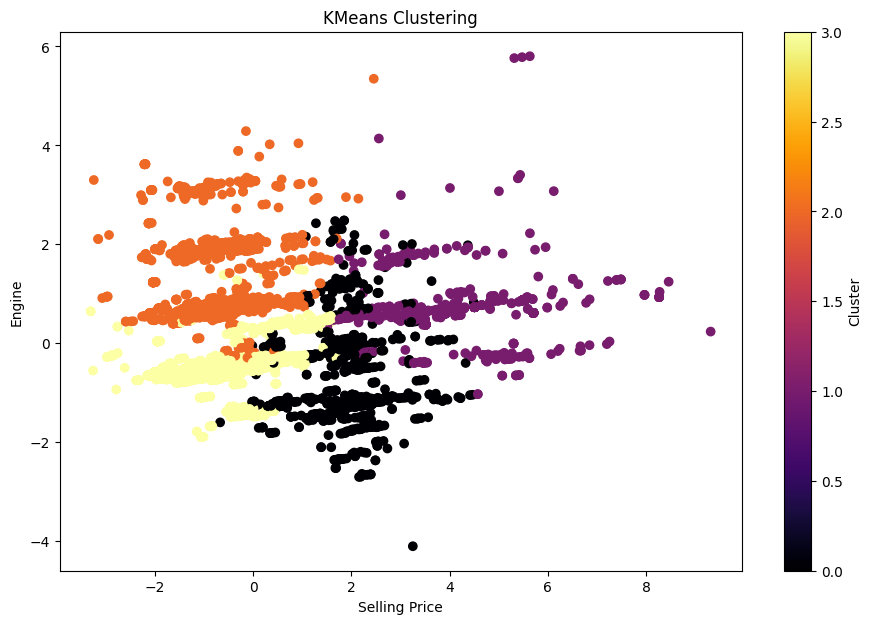

In [118]:
plt.figure(figsize=(11, 7))
plt.scatter(x_pca['selling_price'], x_pca['engine'], c=cluster_labels, cmap='inferno')
plt.xlabel('Selling Price')
plt.ylabel('Engine')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [124]:
x_pca['segment'] = kmean.labels_

grouped_data = x_pca.groupby('segment')

for segment_name, segment_data in grouped_data:
    print(f'Segment {segment_name}:')
    print(segment_data.describe())
    print('\n')

Segment 0:
       selling_price      mileage       engine    max_power        seats  \
count    1208.000000  1208.000000  1208.000000  1208.000000  1208.000000   
mean        1.843399    -1.973454    -0.747682     0.124432    -0.146607   
std         0.758067     0.944454     0.931723     0.552121     0.756178   
min        -0.673717    -5.989597    -4.099660    -4.736839    -3.790025   
25%         1.373083    -2.529515    -1.264615    -0.135455    -0.487530   
50%         1.992538    -1.886119    -1.137750     0.165210    -0.082899   
75%         2.219782    -1.243939    -0.080907     0.435784     0.320918   
max         4.490083     0.622663     2.482968     1.442420     2.148423   

             owner  transmission  segment  
count  1208.000000   1208.000000   1208.0  
mean      0.006498      0.041545      0.0  
std       0.457990      0.700110      0.0  
min      -1.613954     -2.182956      0.0  
25%      -0.279056     -0.558296      0.0  
50%      -0.043311     -0.094923      0.

In [131]:
x['segment_2'] = kmean.labels_
grouped_data = x.groupby('segment_2')

for segment_name, segment_data in grouped_data:
    print(f'Segment {segment_name}:')
    print(segment_data.describe())
    print('\n')

Segment 0:
       selling_price  transmission        owner      mileage       engine  \
count   1.208000e+03   1208.000000  1208.000000  1208.000000  1208.000000   
mean    6.842226e+05      0.027318     0.497517    14.507425  2231.886589   
std     3.766569e+05      0.163076     0.715547     2.204034   395.395214   
min     9.500000e+04      0.000000     0.000000     0.000000   796.000000   
25%     4.347492e+05      0.000000     0.000000    12.990000  2179.000000   
50%     6.000000e+05      0.000000     0.000000    14.100000  2179.000000   
75%     8.500000e+05      0.000000     1.000000    15.960000  2498.000000   
max     3.000000e+06      1.000000     3.000000    21.040000  2982.000000   

         max_power        seats  segment_2  
count  1208.000000  1208.000000     1208.0  
mean    109.504536     7.261589        0.0  
std      31.224555     0.843778        0.0  
min      37.000000     5.000000        0.0  
25%      90.000000     7.000000        0.0  
50%     102.000000     7.

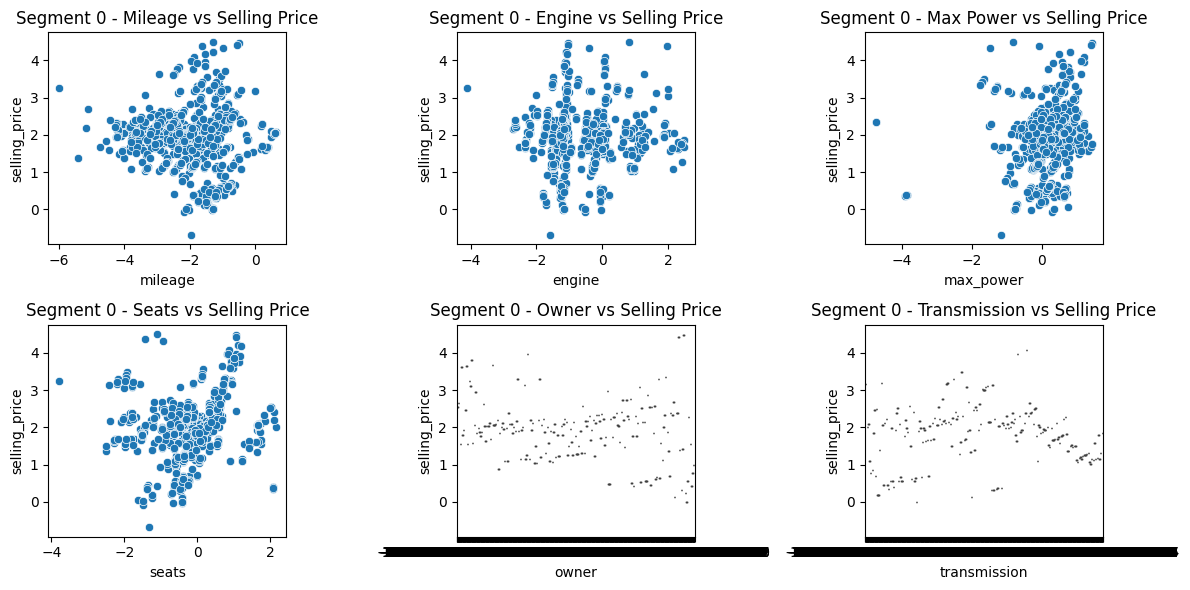

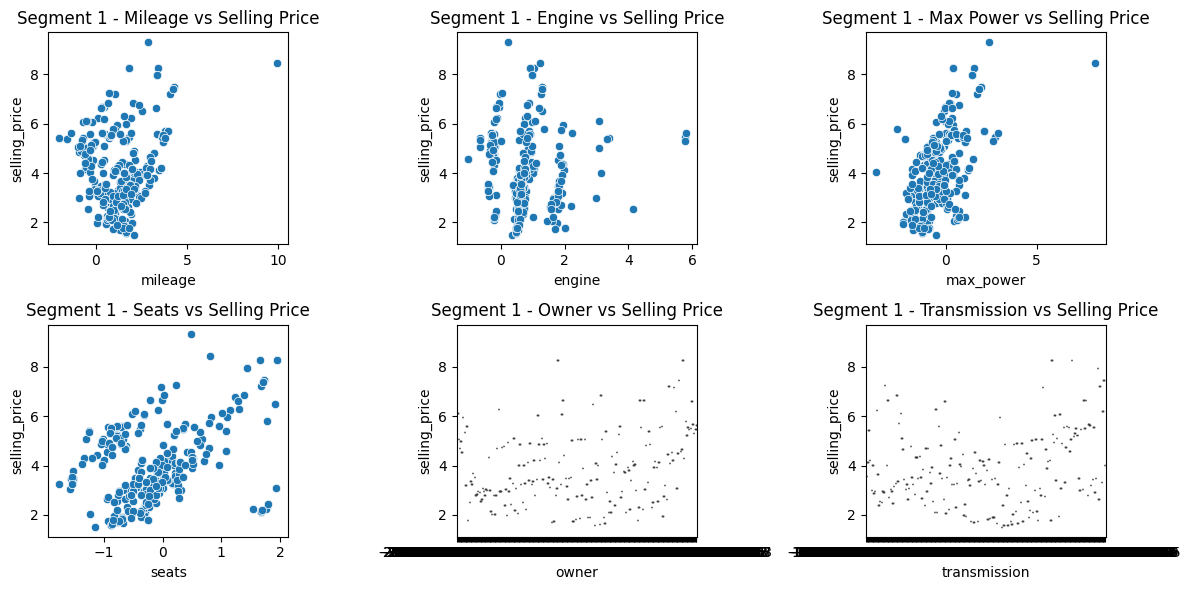

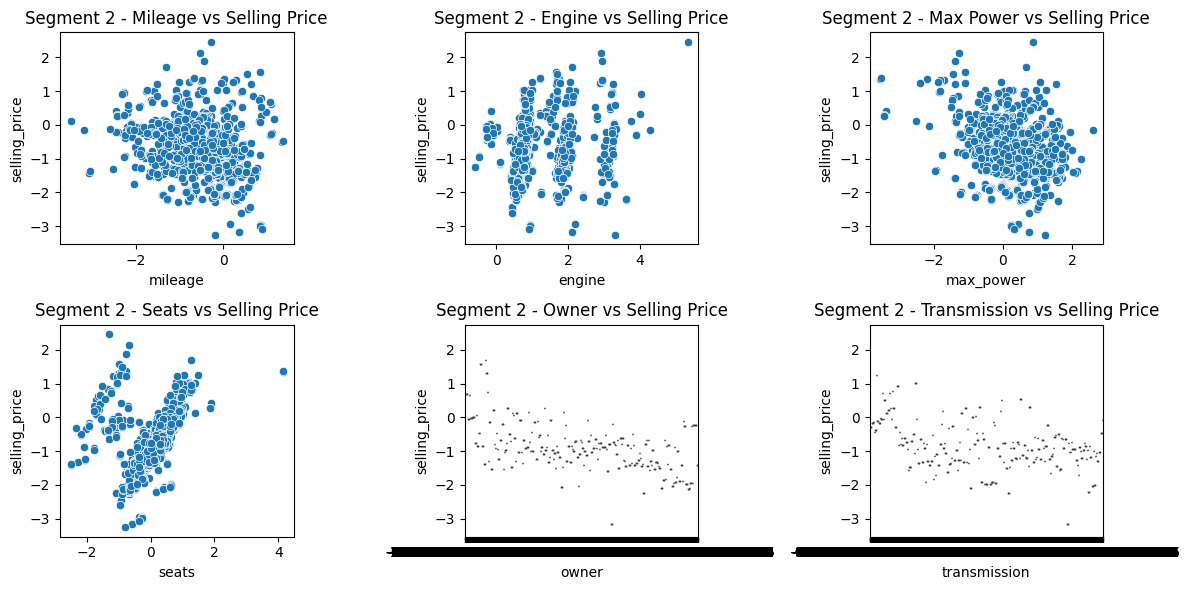

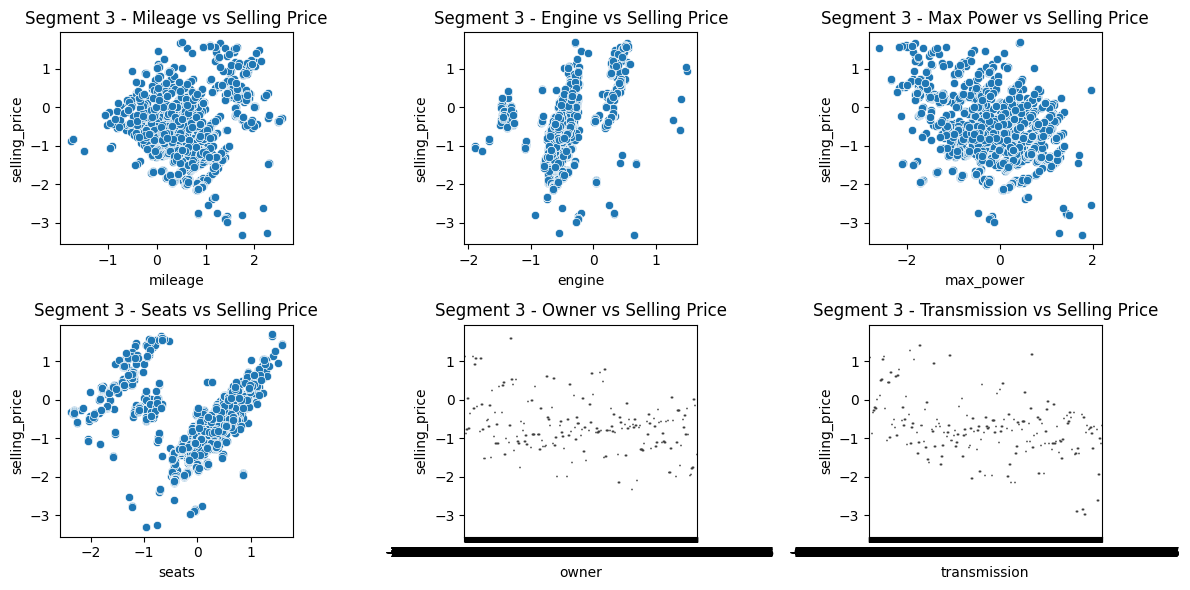

In [126]:
x_pca['segment'] = kmean.labels_

grouped_data = x_pca.groupby('segment')

for segment_name, segment_data in grouped_data:
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 3, 1)
    sns.scatterplot(data=segment_data, x='mileage', y='selling_price')
    plt.title(f'Segment {segment_name} - Mileage vs Selling Price')

    plt.subplot(2, 3, 2)
    sns.scatterplot(data=segment_data, x='engine', y='selling_price')
    plt.title(f'Segment {segment_name} - Engine vs Selling Price')

    plt.subplot(2, 3, 3)
    sns.scatterplot(data=segment_data, x='max_power', y='selling_price')
    plt.title(f'Segment {segment_name} - Max Power vs Selling Price')

    plt.subplot(2, 3, 4)
    sns.scatterplot(data=segment_data, x='seats', y='selling_price')
    plt.title(f'Segment {segment_name} - Seats vs Selling Price')

    plt.subplot(2, 3, 5)
    sns.boxplot(data=segment_data, x='owner', y='selling_price')
    plt.title(f'Segment {segment_name} - Owner vs Selling Price')

    plt.subplot(2, 3, 6)
    sns.boxplot(data=segment_data, x='transmission', y='selling_price')
    plt.title(f'Segment {segment_name} - Transmission vs Selling Price')

    plt.tight_layout()
    plt.show()